# Criminal Analysis

In [5]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
from sklearn import datasets
import gmaps
from config import g_key

plt.style.use('ggplot')

# List of years
year_list = ["2014", "2015", "2016", "2017", "2018"]

### NCVS Personal Victimization Data (2014-2018)

In [6]:
# Set url for personal data API 
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/"

# Set empty lists to hold personal data
weight = []
ager = []
gender = []
hincome = []
newcrime = []
locationr = []
years = []
region=[]
notify=[]

# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json" 
    response = requests.get(query)
    response_json = response.json()
    
    data_list = response_json["personalData"]
  
    for data in data_list:
        
        try: 
            region.append(data['region'])
            years.append(data['year'])
            weight.append(data['weight'])
            ager.append(data['ager'])
            notify.append(data['notify'])
            gender.append(data['gender'])
            hincome.append(data['hincome'])
            newcrime.append(data['newoff'])
            locationr.append(data['locationr'])
        except Exception:
            print("Missed record for personal data")

In [7]:
# Create a dataframe for personal data
ncvs = pd.DataFrame({
        "region":region,
        "file report":notify,
        "year": years,
        "weight": weight,
        "ager": ager,
        "gender": gender,
        "hincome": hincome,
        "newcrime":newcrime,
        "locationr": locationr})

ncvs.head(10)

,region,file report,year,weight,ager,gender,hincome,newcrime,locationr
0,3,1,2014,2877.2646,5,2,4,1,2
1,3,2,2014,4079.9336,4,1,88,3,3
2,3,1,2014,5984.119,4,2,88,3,2
3,3,2,2014,3271.8376,6,1,4,3,5
4,3,1,2014,3402.2559,6,1,88,4,1
5,3,1,2014,2631.5095,8,2,88,2,1
6,2,1,2014,2492.89,6,2,88,4,5
7,2,1,2014,2492.89,6,2,88,4,5
8,2,1,2014,3218.2424,6,2,88,4,5
9,2,2,2014,3994.613,3,1,2,2,3


In [8]:
# Replacing column numerical values into readdable data as per the values assigned in the Personal Crime API
ncvs['ager'] = ncvs['ager'].replace({"1":"12-14",
                                     "2":"15-17",
                                     "3": "18-20",
                                     "4": "21-24",                         
                                     "5": "25-34",
                                     "6": "35-49",
                                     "7": "50-64",                         
                                     "8": "65+"})

ncvs['gender'] = ncvs['gender'].replace({"1":"Male",
                                         "2":"Female"})


ncvs['region'] = ncvs['region'].replace({"1":"NorthEast",
                                         "2": "MidWest",
                                         "3": "South",
                                         "4": "West"})

ncvs['file report'] = ncvs['file report'].replace({"1":"Yes",
                                                   "2": "No",
                                                   "3": "Do not know"})

ncvs['hincome'] = ncvs['hincome'].replace({"1":"<7.5k",
                                           "2": "7.5k-14.9k",
                                           "3": "15k-24.9k",
                                           "4": "25k-34.9k",
                                           "5": "35k-49.9k",
                                           "6": "50k-74.9k",
                                           "7": "75k+",
                                           "88": "Unknown"})

ncvs['locationr'] = ncvs['locationr'].replace({"1":"victim's home",
                                               "2": " friend/neighbor/relative's home",
                                               "3": "com/parking lot or public",
                                               "4": "school",
                                               "5": "other location"})

ncvs['newcrime'] = ncvs['newcrime'].replace({"1":"Rape/sexual assault",
                                             "2": "Robbery",
                                             "3": "Aggravated assault",
                                             "4": "Simple assault",
                                             "5": "Personal theft"})
# Rename columns
ncvs = ncvs.rename(columns = {'ager': 'age', 'hincome': 'income','newcrime': 'crime type', 'locationr': 'location'})

ncvs.head(10)

,region,file report,year,weight,age,gender,income,crime type,location
0,South,Yes,2014,2877.2646,25-34,Female,25k-34.9k,Rape/sexual assault,friend/neighbor/relative's home
1,South,No,2014,4079.9336,21-24,Male,Unknown,Aggravated assault,com/parking lot or public
2,South,Yes,2014,5984.119,21-24,Female,Unknown,Aggravated assault,friend/neighbor/relative's home
3,South,No,2014,3271.8376,35-49,Male,25k-34.9k,Aggravated assault,other location
4,South,Yes,2014,3402.2559,35-49,Male,Unknown,Simple assault,victim's home
5,South,Yes,2014,2631.5095,65+,Female,Unknown,Robbery,victim's home
6,MidWest,Yes,2014,2492.89,35-49,Female,Unknown,Simple assault,other location
7,MidWest,Yes,2014,2492.89,35-49,Female,Unknown,Simple assault,other location
8,MidWest,Yes,2014,3218.2424,35-49,Female,Unknown,Simple assault,other location
9,MidWest,No,2014,3994.613,18-20,Male,7.5k-14.9k,Robbery,com/parking lot or public


### NCVS Household Victimization Data (2014-2018)

In [9]:
# Set url for household data API 
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/household/"

# Set empty lists to hold household data
weight_h =[]
ager_h = []
gender_h = []
hincome_h = []
newcrime_h = []
locationr_h = []
years_h = []
region_h=[]
notify_h=[]

# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json"
    response = requests.get(query)
    response_json = response.json()
    
    data_list=response_json["householdData"]
  
    for data in data_list:
        
        try: 
            region_h.append(data['region'])
            years_h.append(data['year'])
            weight_h.append(data['weight'])
            ager_h.append(data['hhage'])
            notify_h.append(data['notify'])
            gender_h.append(data['hhgen'])
            hincome_h.append(data['hincome'])
            newcrime_h.append(data['newoff'])
            locationr_h.append(data['locationr'])
        except Exception:
           print("Missed record for household data")

In [10]:
# Create a dataframe for household data
ncvs_h = pd.DataFrame({
    "region_h":region_h,
    "notify_h":notify_h,
    "year_h": years_h,
    "weight_h": weight_h,
    "age_h": ager_h,
    "gender_h": gender_h,
    "hincome_h": hincome_h,
    "newcrime_h": newcrime_h,
    "locationr_h": locationr_h})

ncvs_h.head(10)

,region_h,notify_h,year_h,weight_h,age_h,gender_h,hincome_h,newcrime_h,locationr_h
0,4,1,2014,2838.076,2,2,4,6,1
1,4,1,2014,3188.369,4,2,7,8,3
2,4,2,2014,3303.2144,3,2,7,8,1
3,4,1,2014,3795.8252,2,1,4,8,1
4,4,2,2014,3044.386,3,1,1,8,1
5,4,2,2014,3044.386,3,1,1,8,4
6,4,2,2014,3424.7,2,2,3,8,4
7,4,1,2014,3832.7285,2,1,88,8,3
8,4,2,2014,2739.687,3,2,88,8,1
9,4,2,2014,2739.687,3,2,88,7,1


In [11]:
# Replacing column numerical values into readdable data as per the values assigned in the Household Crime API

ncvs_h['age_h'] = ncvs_h['age_h'].replace({"1":"<19",
                                           "2":"20-34",
                                           "3": "35-49",
                                           "4": "50-64",
                                           "5": "65+"})

ncvs_h['gender_h'] = ncvs_h['gender_h'].replace({"1":"Male",
                                                 "2":"Female"})

ncvs_h['region_h'] = ncvs_h['region_h'].replace({"1":"Northeast",
                                                 "2": "Midwest",
                                                 "3": "South",
                                                 "4": "West"})

ncvs_h['notify_h'] = ncvs_h['notify_h'].replace({"1":"Yes",
                                                 "2": "No",
                                                 "3": "Do not know"})

ncvs_h['hincome_h'] = ncvs_h['hincome_h'].replace({"1":"<7.5k",
                                                   "2": "7.5k-14.9k",
                                                   "3": "15k-24.9k",
                                                   "4": "25k-34.9k",
                                                   "5": "35k-49.9k",
                                                   "6": "50k-74.9k",
                                                   "7": "75k+",
                                                   "88": "Unknown"})

ncvs_h['locationr_h'] = ncvs_h['locationr_h'].replace({"1":"victim's home",
                                                       "2": " friend/neighbor/relative's home",
                                                       "3": "com/parking lot or public",
                                                       "4": "school",
                                                       "5": "other location"})

ncvs_h['newcrime_h'] = ncvs_h['newcrime_h'].replace({"8":"Theft",
                                                     "7": "Motor-vehicle theft",
                                                     "6": "Burglary/trespassing"})

# Rename columns
ncvs_h = ncvs_h.rename(columns = {'region_h': 'region', 'notify_h': 'file report',
                       'year_h': 'year', 'weight_h': 'weight',
                       'age_h': 'age', 'gender_h': 'gender',
                       'hincome_h': 'income', 'newcrime_h':'crime type',
                       'locationr_h': 'location'})

ncvs_h.head(10)

,region,file report,year,weight,age,gender,income,crime type,location
0,West,Yes,2014,2838.076,20-34,Female,25k-34.9k,Burglary/trespassing,victim's home
1,West,Yes,2014,3188.369,50-64,Female,75k+,Theft,com/parking lot or public
2,West,No,2014,3303.2144,35-49,Female,75k+,Theft,victim's home
3,West,Yes,2014,3795.8252,20-34,Male,25k-34.9k,Theft,victim's home
4,West,No,2014,3044.386,35-49,Male,<7.5k,Theft,victim's home
5,West,No,2014,3044.386,35-49,Male,<7.5k,Theft,school
6,West,No,2014,3424.7,20-34,Female,15k-24.9k,Theft,school
7,West,Yes,2014,3832.7285,20-34,Male,Unknown,Theft,com/parking lot or public
8,West,No,2014,2739.687,35-49,Female,Unknown,Theft,victim's home
9,West,No,2014,2739.687,35-49,Female,Unknown,Motor-vehicle theft,victim's home


### Raleigh Police Incidents (NIBRS) data (2014-2020)

In [12]:
# Getting data
raleigh_data=requests.get('https://opendata.arcgis.com/datasets/24c0b37fa9bb4e16ba8bcaa7e806c615_0.geojson').json()
data_set=[]
for record in raleigh_data["features"]:
    data_set.append(record["properties"])

In [13]:
# Create a dataframe for Raleigh Police Incidents data
df=pd.DataFrame(data_set)
df=df[["crime_category","crime_type","city","district","reported_year","reported_month","reported_dayofwk","reported_day","reported_hour","latitude","longitude"]]
df.head(10)


,crime_category,crime_type,city,district,reported_year,reported_month,reported_dayofwk,reported_day,reported_hour,latitude,longitude
0,MISCELLANEOUS,,RALEIGH,Downtown,2015,10,Friday,16,11,0.0,0.0
1,MISCELLANEOUS,,RALEIGH,Northwest,2016,5,Tuesday,10,0,0.0,0.0
2,MISCELLANEOUS,,RALEIGH,Downtown,2016,3,Wednesday,23,21,0.0,0.0
3,MISCELLANEOUS,,RALEIGH,Southeast,2015,8,Saturday,15,16,0.0,0.0
4,MISCELLANEOUS,,RALEIGH,Northeast,2017,10,Thursday,19,9,0.0,0.0
5,MISCELLANEOUS,,RALEIGH,North,2015,9,Wednesday,30,14,0.0,0.0
6,MISCELLANEOUS,,RALEIGH,Northwest,2017,7,Saturday,15,12,0.0,0.0
7,MISCELLANEOUS,,RALEIGH,Northwest,2017,7,Friday,14,11,0.0,0.0
8,MISCELLANEOUS,,RALEIGH,Southeast,2017,9,Thursday,28,20,0.0,0.0
9,MISCELLANEOUS,,RALEIGH,Southeast,2015,2,Saturday,7,18,0.0,0.0


## NCVS Analysis

### Household and Personal Crime Reports Analysis

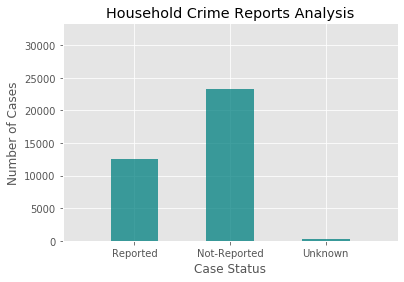

In [14]:
# Analysing the number of crimes that were reported in household crimes dataset
ncvsh_filtered=ncvs_h.drop(['year', 'weight', 'age', 'gender', 'income', 'crime type', 'location'], axis=1)

# Getting the count of file rpeorts
Reported=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("Yes")].count()
Not_Reported=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("No")].count()
Unknown=ncvsh_filtered[ncvsh_filtered['file report'].str.contains("Do not know")].count()
file_reports=[Reported["file report"], Not_Reported["file report"], Unknown["file report"]]

# Plotting the bar chart
cases=file_reports
x_axis=x_axis=np.arange(len(cases))
tick_locations=x_axis.copy()
plt.bar(x_axis, cases, color ='teal', alpha=0.75, align='center', width=0.5 )
plt.xticks(tick_locations, ["Reported", "Not-Reported", "Unknown"])
plt.title('Household Crime Reports Analysis')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(cases)+10000)
plt.show()

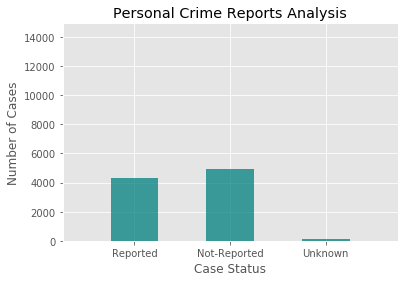

In [15]:
# Analysing the number of crimes that were reported in personal crimes dataset
ncvsp_filtered=ncvs.drop(['year', 'weight', 'age', 'gender', 'income', 'crime type', 'location'], axis=1)

# Getting the count of file rpeorts
Reported=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("Yes")].count()
Not_Reported=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("No")].count()
Unknown=ncvsp_filtered[ncvsp_filtered['file report'].str.contains("Do not know")].count()
file_reports=[Reported['file report'], Not_Reported['file report'], Unknown['file report']]

# Plotting the bar chart for personal crimes
cases_p=file_reports
x_axis=x_axis=np.arange(len(cases_p))
tick_locations=x_axis.copy()
plt.bar(x_axis, cases_p, color ='teal', alpha=0.75, align='center', width=0.5 )
plt.xticks(tick_locations, ["Reported", "Not-Reported", "Unknown"])
plt.title('Personal Crime Reports Analysis')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(cases_p)+10000)
plt.show()

### Household and Personal Crime Risk Analysis

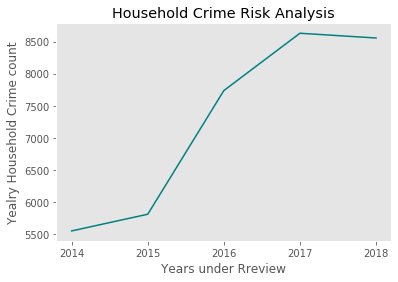

In [16]:
# Counting the number of personal crimes for each year
ncvsh_yearfilter=ncvs_h.drop(['region', 'weight', 'age', 'gender', 'income', 'file report', 'crime type', 'location'], axis=1)

crime_2014=ncvsh_yearfilter[ncvsh_yearfilter['year'].str.contains("2014")].count()
crime_2015=ncvsh_yearfilter[ncvsh_yearfilter['year'].str.contains("2015")].count()
crime_2016=ncvsh_yearfilter[ncvsh_yearfilter['year'].str.contains("2016")].count()
crime_2017=ncvsh_yearfilter[ncvsh_yearfilter['year'].str.contains("2017")].count()
crime_2018=ncvsh_yearfilter[ncvsh_yearfilter['year'].str.contains("2018")].count()

# Plotting Which year has the highest personal crime
crime_count =[crime_2014, crime_2015, crime_2016, crime_2017, crime_2018]
years=("2014", "2015", "2016", "2017", "2018")

# Plot the charts and apply some styling
crime_occurance = plt.plot(years, crime_count, color="teal")
plt.xlabel("Years under Rreview")
plt.ylabel('Yealry Household Crime count')
plt.title("Household Crime Risk Analysis")
plt.grid()
plt.show()

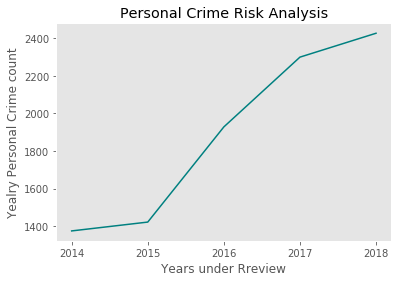

In [17]:
# Counting the number of personal crimes for each year
ncvsp_yearfilter=ncvs.drop(['region', 'weight', 'age', 'gender', 'income', 'file report', 'crime type', 'location'], axis=1)

crime2014=ncvsp_yearfilter[ncvsp_yearfilter['year'].str.contains("2014")].count()
crime2015=ncvsp_yearfilter[ncvsp_yearfilter['year'].str.contains("2015")].count()
crime2016=ncvsp_yearfilter[ncvsp_yearfilter['year'].str.contains("2016")].count()
crime2017=ncvsp_yearfilter[ncvsp_yearfilter['year'].str.contains("2017")].count()
crime2018=ncvsp_yearfilter[ncvsp_yearfilter['year'].str.contains("2018")].count()

# Plotting Which year has the highest personal crime
crime_count =[crime2014, crime2015, crime2016, crime2017, crime2018]
years=("2014", "2015", "2016", "2017", "2018")

# Plot the charts and apply some styling
crime_occurance = plt.plot(years, crime_count, color="teal")
plt.xlabel("Years under Rreview")
plt.ylabel('Yealry Personal Crime count')
plt.title("Personal Crime Risk Analysis")
plt.grid()
plt.show()

### Household and Personal Crimes by Gender

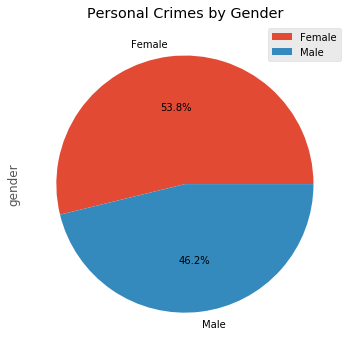

In [18]:
ncvs['gender'].value_counts(normalize = True)
ncvs['gender'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%',
    title = 'Personal Crimes by Gender',
    kind = 'pie',
    figsize = (5, 5), 
    legend = True)
plt.tight_layout()
plt.show()

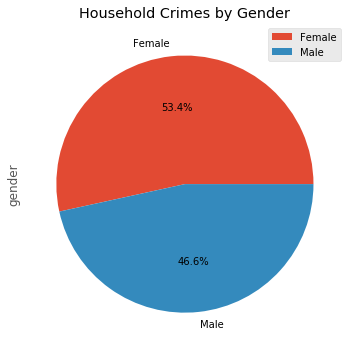

In [19]:
ncvs_h['gender'].value_counts(normalize = True)
ncvs_h['gender'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%', 
    title = 'Household Crimes by Gender', 
    kind = 'pie',
    figsize = (5, 5),
    legend = True)
plt.tight_layout()
plt.show()

### Household and Personal Crimes by Crime Type

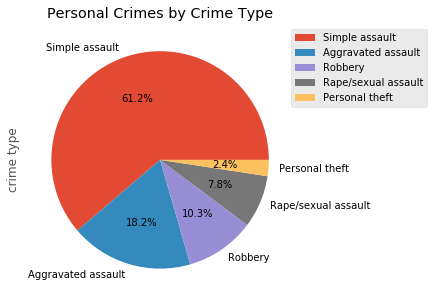

In [20]:
ncvs['crime type'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%', 
    title = 'Personal Crimes by Crime Type',
    kind = 'pie',
    figsize = (5, 5), 
    legend = True)
plt.legend(loc = "best", bbox_to_anchor = (0.5, 0.5, 1, 0.5))
plt.show()

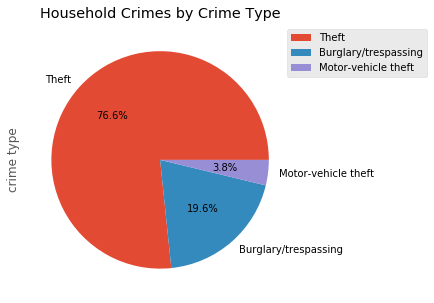

In [21]:
ncvs_h['crime type'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%', 
    title = 'Household Crimes by Crime Type',
    kind = 'pie',
    figsize = (5, 5), 
    legend = True)
plt.legend(loc = "best", bbox_to_anchor = (0.5, 0.5, 1, 0.5))
plt.show()

### Household and Personal Crimes by Location

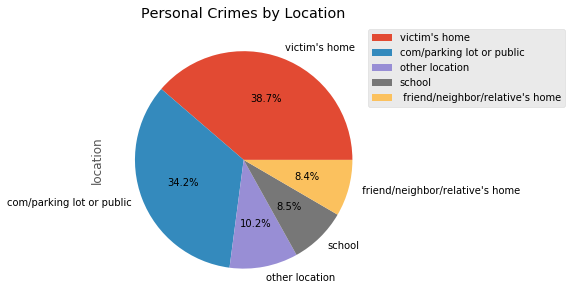

In [22]:
ncvs['location'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%', 
    title = 'Personal Crimes by Location',
    kind = 'pie',
    figsize = (5, 5), 
    legend = True)
plt.legend(loc = "best", bbox_to_anchor = (0.5, 0.5, 1.2, 0.5))
plt.show()

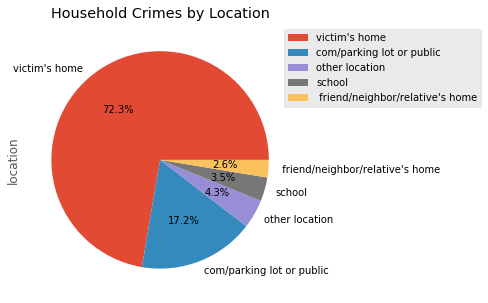

In [23]:
ncvs_h['location'].value_counts(normalize = True).plot(
    autopct = '%1.1f%%', 
    title = 'Household Crimes by Location',
    kind = 'pie',
    figsize = (5, 5), 
    legend = True)
plt.legend(loc = "best", bbox_to_anchor = (0.5, 0.5, 1.2, 0.5))
plt.show()

### Household and Personal Crime Victimization by Income Category For All Four Regions, 2014 - 2018

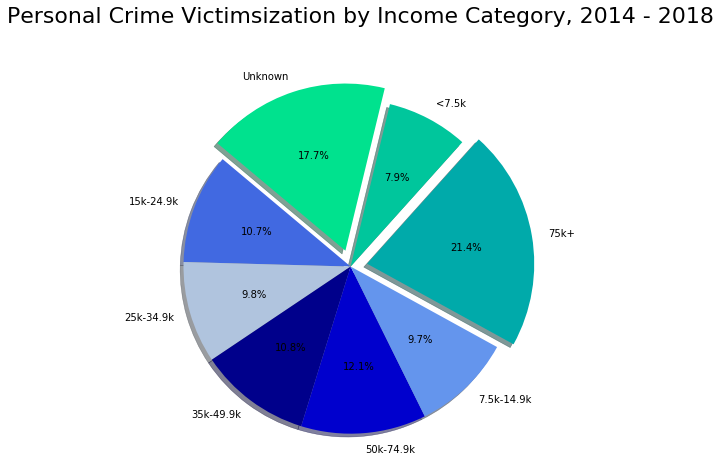

In [24]:
# Create GroupBy object based on "income":
grouped_pincome_df=ncvs.groupby(['income'])

# Total number of victims in each income group:
total_pvictims_by_grup=grouped_pincome_df['gender'].count()

# Total number of victims:
total_pvictims=ncvs['income'].count()

# Calculate percentage of victims in each income group:
pct_of_pvictims=(total_pvictims_by_grup/total_pvictims)*100

# Change index:
pct_of_pvictims=pct_of_pvictims.reset_index()

# Sort by income groups:
pct_of_pvictims.loc[[6,4,0,1,2,3,5,7],:]

# Personal crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_pvictims['gender'], labels=pct_of_pvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Personal Crime Victimsization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

plt.show()

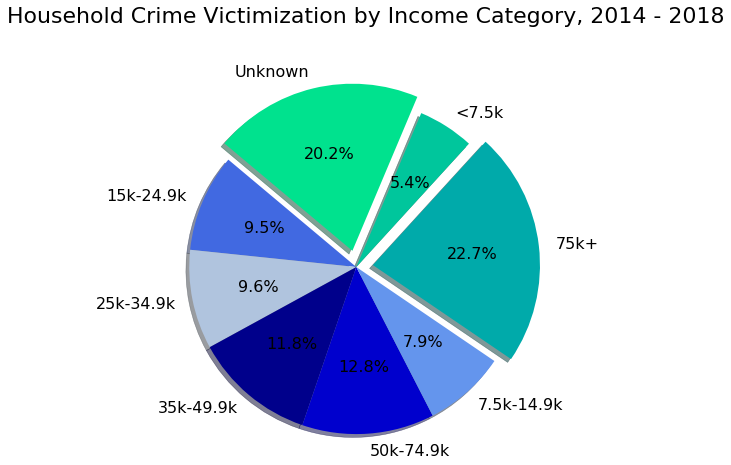

In [25]:
# Create GroupBy object based on "income":
grouped_hincome_df=ncvs_h.groupby(['income'])

# Total number of victims in each income group:
total_hvictims_by_grup=grouped_hincome_df['gender'].count()

# Total number of victims:
total_hvictims=ncvs_h['income'].count()

# Calculate percentage of victims in each income group:
pct_of_hvictims=(total_hvictims_by_grup/total_hvictims)*100

# Change index:
pct_of_hvictims=pct_of_hvictims.reset_index()

# Sort by income groups:
pct_of_hvictims.loc[[6,4,0,1,2,3,5,7],:]

# Household crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_hvictims['gender'], labels=pct_of_hvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Household Crime Victimization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

plt.show()

### Household and Personal Crime Victimization by Region, 2014 - 2018

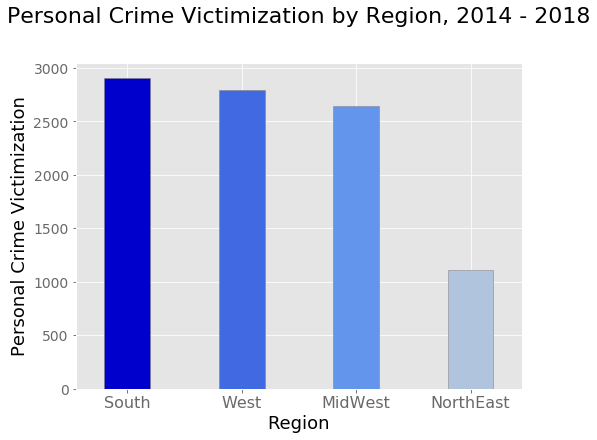

In [26]:
# Calculate total crime by region:
pcrime_by_region=ncvs['region'].value_counts()

# Personal crime bar chart by region:
p_chart=pcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)
# Set x-label, y-label, and title:
p_chart.set_title('Personal Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
p_chart.set_xlabel('Region',fontsize=18, color='black')
p_chart.set_ylabel('Personal Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in p_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in p_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 3050)

plt.show()

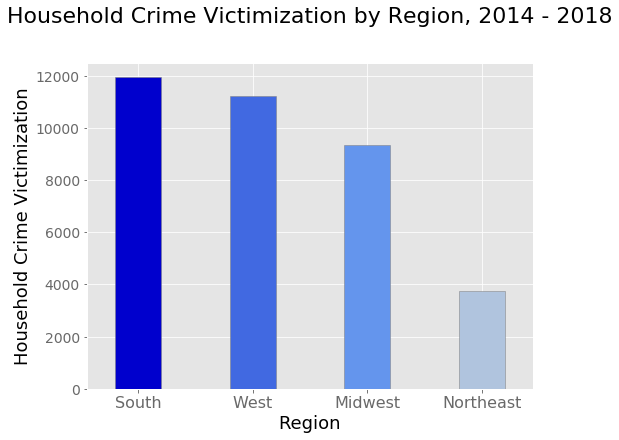

In [27]:
# Calculate total crime by region:
hcrime_by_region=ncvs_h['region'].value_counts()

# Household crime bar chart by region:
h_chart=hcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)

# Set x-label, y-label, and title:
h_chart.set_title('Household Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
h_chart.set_xlabel('Region',fontsize=18, color='black')
h_chart.set_ylabel('Household Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in h_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in h_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 12500)

plt.show()

### Household and Personal Crime Victimization Change by Region, 2014 - 2018

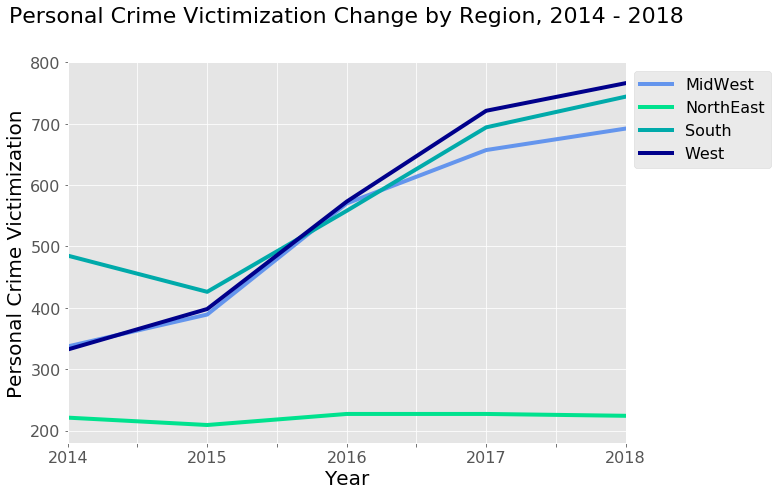

In [28]:
# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
pyear_grouped_df=ncvs.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Personal Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Personal Crime Victimization', fontsize=20, color='black')
plt.ylim(180,800)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

plt.show()

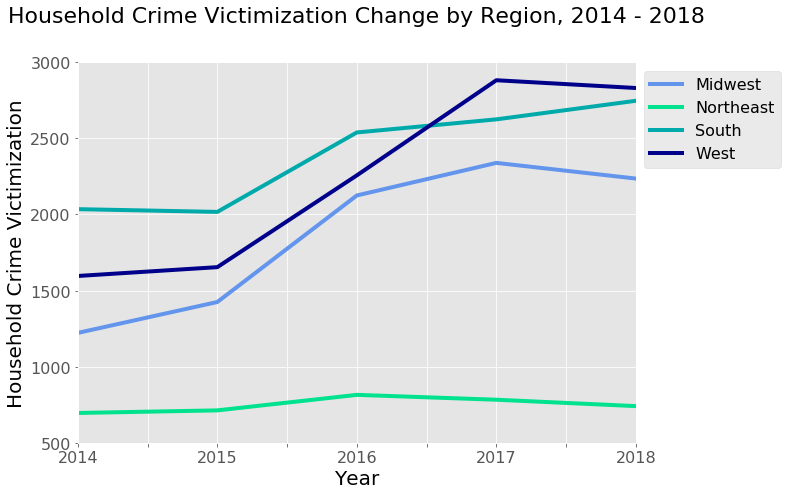

In [29]:

# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
hyear_grouped_df=ncvs_h.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Household Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Household Crime Victimization', fontsize=20, color='black')
plt.ylim(500,3000)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

plt.show()

### Household and Average Personal Crime Victimization by Age Category, 2014 - 2018

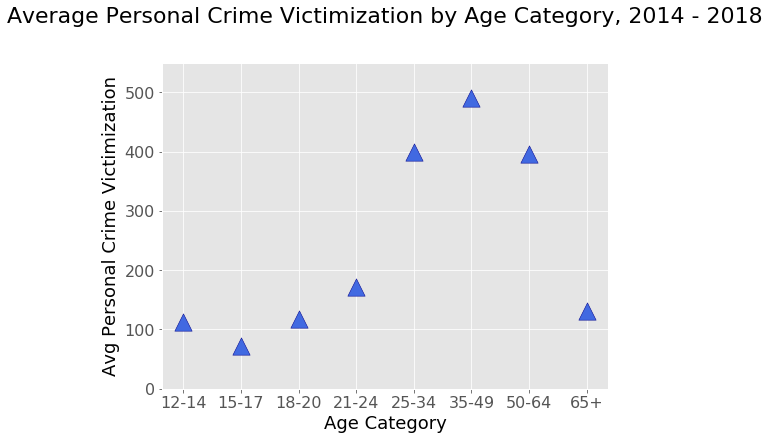

In [30]:
# Extruct columns of interest from original data frame:
ncvs_2=ncvs[['region','year','age']]

# Create a pivot table and calculate victims average for each age category for period between 2014-2018:
pvictim_avg_by_age=ncvs_2.groupby(['year','age']).count()['region'].unstack()

# New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_df=pvictim_avg_by_age.mean().reset_index()

# Rename column:
avg_pvictim_vs_age_df=avg_pvictim_vs_age_df.rename(columns={0:'Avg Victim Count'})
avg_pvictim_vs_age_df=round(avg_pvictim_vs_age_df,0)

# Generate a scatter plot of age category vs average victim count between 2014-2018:
plt.figure(figsize=(8,6))
plt.ylim(0,550)

plt.scatter(avg_pvictim_vs_age_df.iloc[:,0], avg_pvictim_vs_age_df.iloc[:,1], 
            s=[300], color='royalblue', edgecolors='darkblue',  marker='^')

plt.xlabel('Age Category', fontsize=18, color='black')
plt.ylabel('Avg Personal Crime Victimization', fontsize=18, color='black')
plt.title('Average Personal Crime Victimization by Age Category, 2014 - 2018', fontsize=22, pad=40)

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)
for tick in ax.get_yticklabels():
    tick.set_fontsize(10)

degrees = 0
plt.xticks(rotation=degrees)    

plt.show()

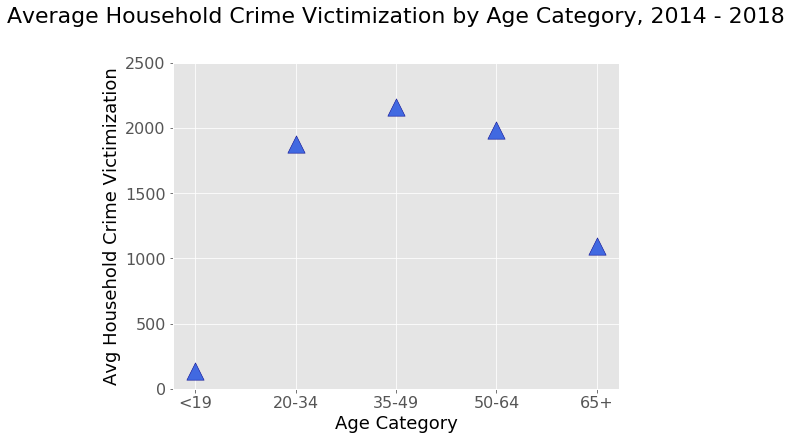

In [31]:
# Extruct columns of interest from original data frame:
ncvs_h2=ncvs_h[['region','year','age']]

# Create a pivot table and calculate victims average for each age category for period between 2014-2018:
hvictim_avg_by_age=ncvs_h2.groupby(['year','age']).count()['region'].unstack()

# New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_df=hvictim_avg_by_age.mean().reset_index()

# Rename column:
avg_hvictim_vs_age_df=avg_hvictim_vs_age_df.rename(columns={0:'Avg Victim Count'})

# Sort by age groups:
avg_hvictim_vs_age_df=round(avg_hvictim_vs_age_df.loc[[4,0,1,2,3],:],0)

# Generate a scatter plot of age category vs average victim count between 2014-2018:
plt.figure(figsize=(8,6))
plt.ylim(0,2500)

plt.scatter(avg_hvictim_vs_age_df.iloc[:,0], avg_hvictim_vs_age_df.iloc[:,1], 
            s=[300], color='royalblue', edgecolors='darkblue',  marker='^')

plt.xlabel('Age Category', fontsize=18, color='black')
plt.ylabel('Avg Household Crime Victimization', fontsize=18, color='black')
plt.title('Average Household Crime Victimization by Age Category, 2014 - 2018', fontsize=22, pad=40)

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)
for tick in ax.get_yticklabels():
    tick.set_fontsize(10)

degrees = 0
plt.xticks(rotation=degrees)    

plt.show()

## Raleigh Police Incidents Analysis

### The Types of  Crime Analysis

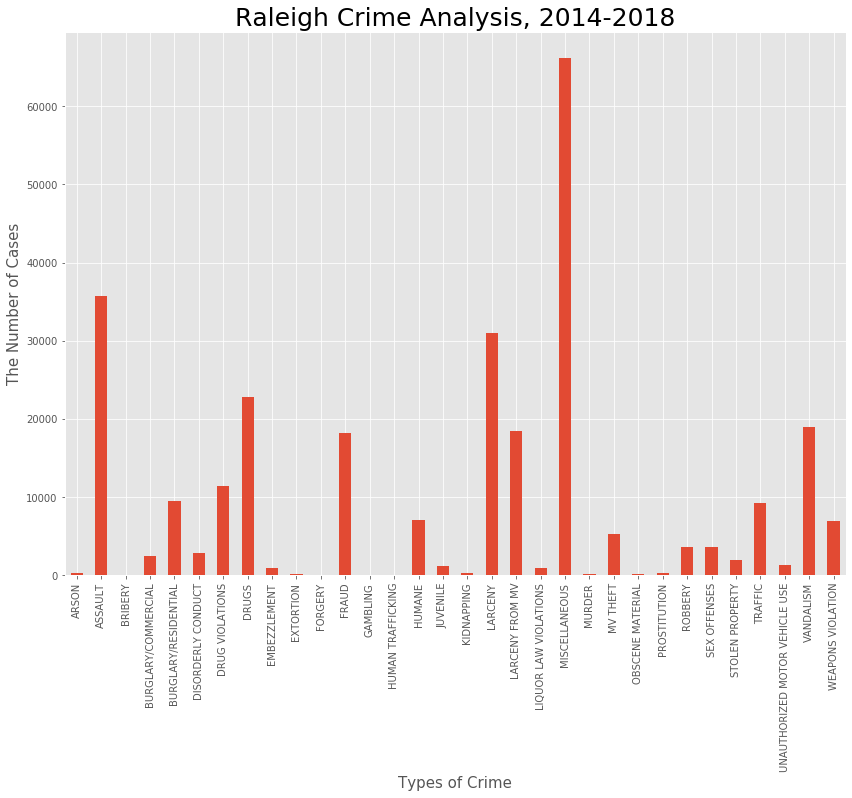

In [32]:
data_chart=df[df["crime_category"]!="ALL OTHER OFFENSES"].groupby(["crime_category"])["city"].count()

data_chart=data_chart.plot(kind="bar",figsize=(14,10))
plt.title("Raleigh Crime Analysis, 2014-2018",fontSize=25)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xlabel("Types of Crime",fontSize=15)
plt.ylabel("The Number of Cases",fontSize=15)
plt.show()

### Types of Crime vs Raleigh Districts

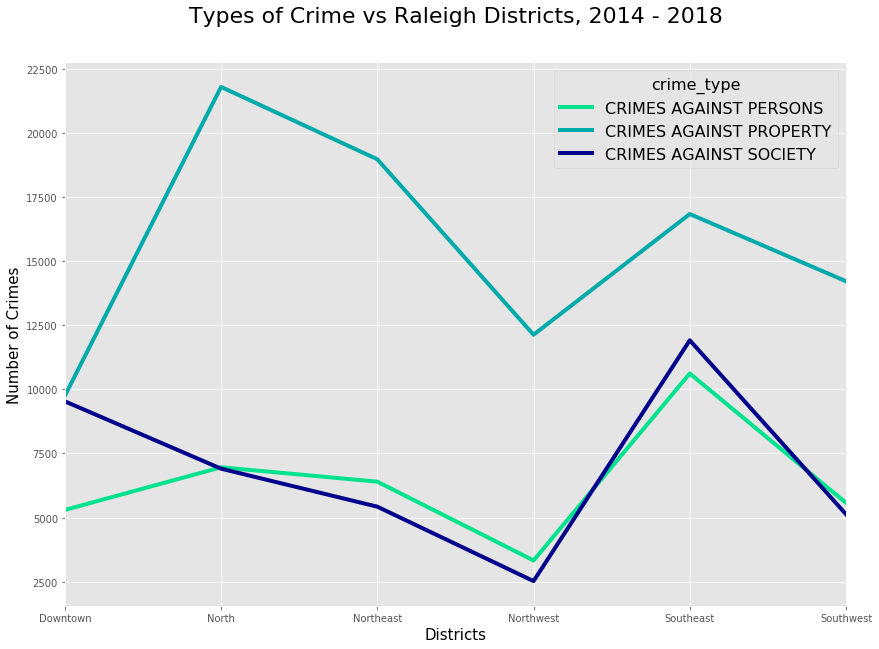

In [33]:
district_df=df[(df["crime_type"]!='') & (df["district"]!='UNK')].groupby(['district','crime_type']).count()['reported_year'].unstack().plot(figsize=(14,10),linewidth=4,color=['#00E28E','#00AAAA','darkblue'])
title=plt.title('Types of Crime vs Raleigh Districts, 2014 - 2018', fontsize=22, pad=40)
xlabel=plt.xlabel('Districts', fontsize=15, color='black')
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
ylabel=plt.ylabel('Number of Crimes', fontsize=15, color='black')

### Number of Cases Based on Reportes Hour

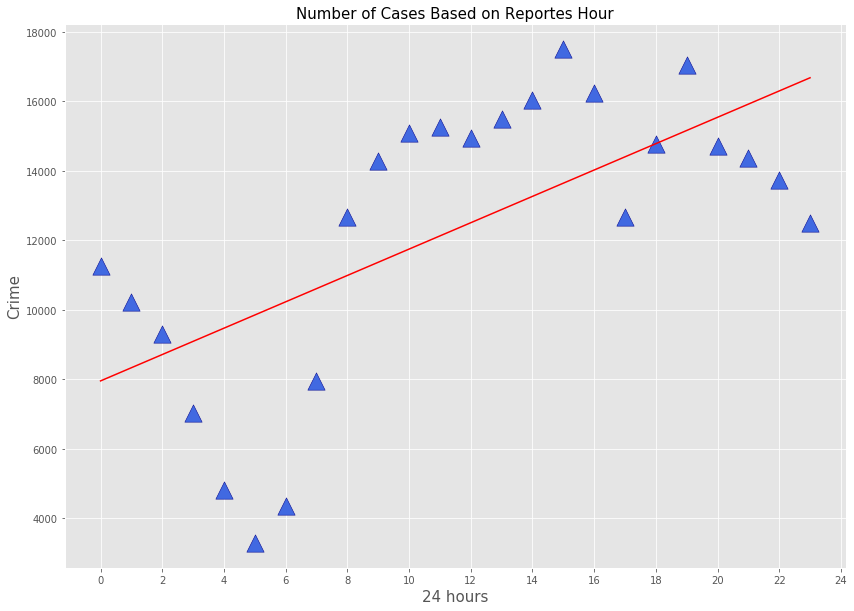

In [34]:
day_graph=df.groupby(["reported_hour"])["crime_category"].count().reset_index()
x_values = day_graph['reported_hour']
y_values = day_graph['crime_category']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=(14,10)) 
plt.scatter(x_values, y_values, s=[300], color='royalblue', edgecolors='darkblue',  marker='^')
plt.plot(x_values,regress_values,"r-")
plt.title("Number of Cases Based on Reportes Hour",fontsize=15)
plt.xlabel('24 hours',fontsize=15)
plt.ylabel('Crime',fontsize=15)
plt.xticks(fontSize=10)
plt.yticks(fontSize=10)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.show()

### Google Map Analysis

In [64]:
map_df=df.groupby(["latitude","longitude"]).count().reset_index()
map_df=map_df.loc[1:,:]

gmaps.configure(api_key=g_key)

locations=map_df[["latitude","longitude"]]
weight=map_df["crime_category"].astype(float)

# Add layer to map
fig=gmaps.figure(center=(35.7796,-78.6382),zoom_level=10.2)
heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=np.max(weight),
                                 point_radius=0.01)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))